In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
# Load Dataset
df = pd.read_csv("house_price.csv")

# Dataset Details
print("\nDataset info:")
print("__________________________________________\n")
df.info()

# Get dataset calculation summary
print("\nDataset Description")
print("__________________________________________\n")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print("__________________________________________")
df.isnull().sum()


Dataset info:
__________________________________________

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB

Dataset Description
__________________________________________

         total_sqft          bath         price           bhk  price_per_sqft
count  13200.000000  13200.000000  13200.000000  13200.000000    1.320000e+04
mean    1555.302783      2.691136    112.276178      2.800833    7.920337e+03
std     1237.323445      1.338915    149.175995      1.292843    

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

In [51]:
# Detect and remove outliers using IQR method
Q1 = df["price_per_sqft"].quantile(0.25)
Q3 = df["price_per_sqft"].quantile(0.75)
IQR = Q3 - Q1
df_filtered = df[(df["price_per_sqft"] >= Q1 - 1.5 * IQR) & (df["price_per_sqft"] <= Q3 + 1.5 * IQR)]
df_filtered.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,11935.000000,11935.000000,11935.000000,11935.000000,11935.000000
mean,1514.629659,2.533641,87.654926,2.644826,5575.925513
std,1195.959790,1.111145,73.154677,1.051124,1957.779783
min,276.000000,1.000000,8.000000,1.000000,267.000000
25%,1100.000000,2.000000,48.000000,2.000000,4166.000000
50%,1270.000000,2.000000,66.780000,2.000000,5188.000000
75%,1634.500000,3.000000,100.000000,3.000000,6603.000000
max,52272.000000,27.000000,2100.000000,27.000000,11875.000000


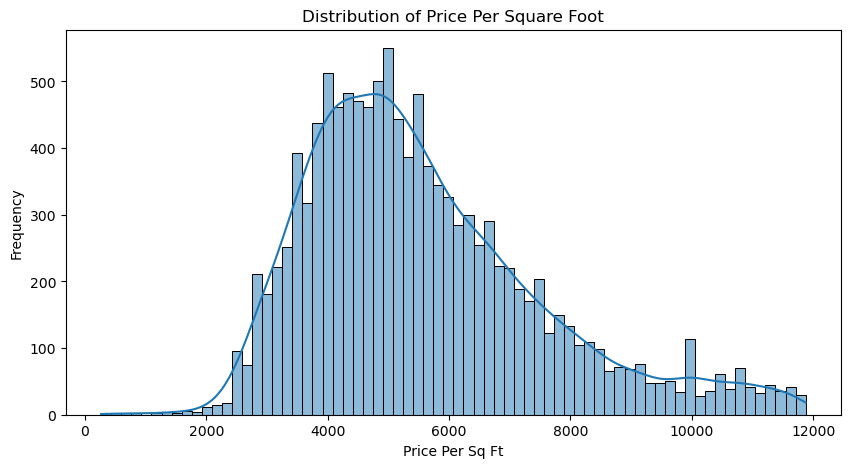

In [33]:
# Plot distribution
plt.figure(figsize=(10,5))
sns.histplot(df_filtered["price_per_sqft"], bins=70, kde=True)
plt.title("Distribution of Price Per Square Foot")
plt.xlabel("Price Per Sq Ft")
plt.ylabel("Frequency")
plt.show()


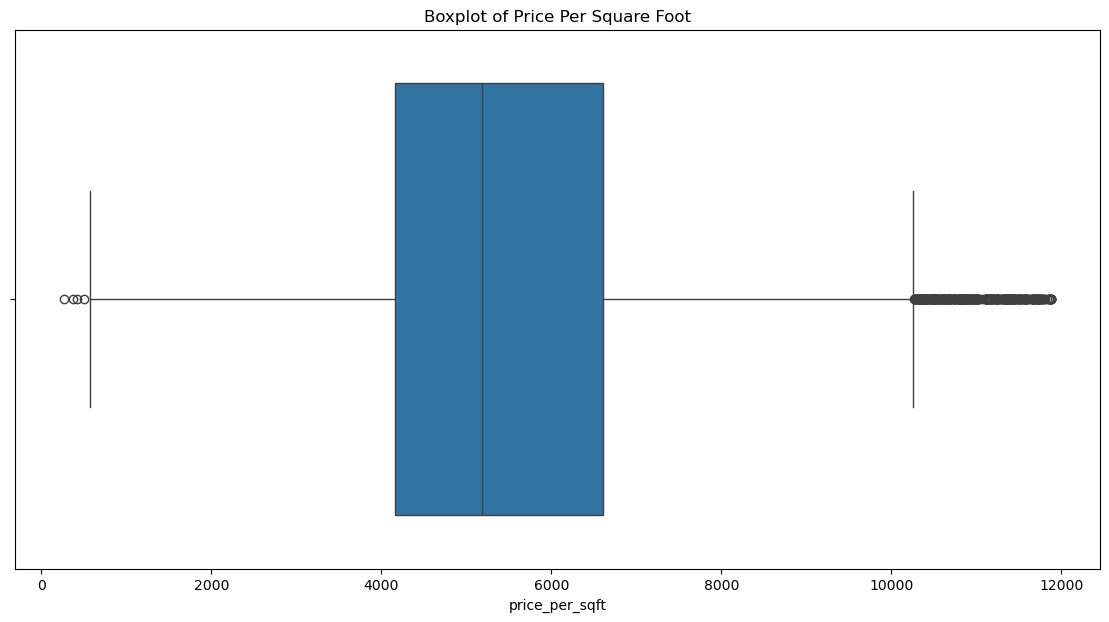

In [45]:
# Boxplot to check for outliers
plt.figure(figsize=(14,7))
sns.boxplot(x=df_filtered["price_per_sqft"])
plt.title("Boxplot of Price Per Square Foot")
plt.show()


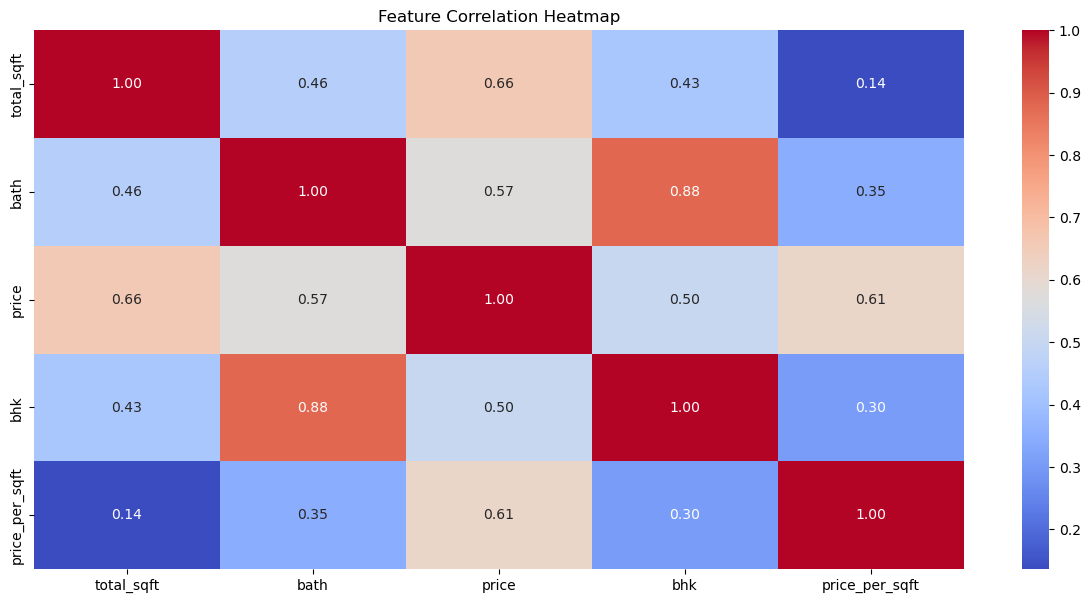

In [77]:
# Heatmap to check correlations
numeric_df = df_filtered.select_dtypes(include=[np.number])
plt.figure(figsize=(15,7))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()
